In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import torch
from torchvision import transforms#, utils

#local script
from geographic_zones import create_geo_zones, classify_geographic_zones
from Custom_dataloader_geozones import MapDataset, Rescale, CenterCrop, Normalize, ToTensor
from Custom_model_geozones import SimpleCNN

Number of geographic zones:  193
Training batch size:  50
0 torch.Size([50, 200, 200, 3])


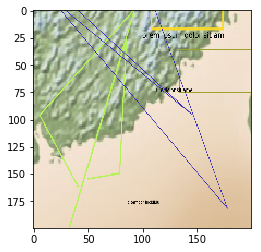

In [9]:
if __name__ == '__main__':
    # define a seed for reproducibility
    seed = 5436457
    torch.manual_seed(seed)
    
    ##============Read xcel files====================
    ###Training set
    trainDF = pd.read_csv("./data/piom_train_30k.csv")
    trainDF.drop(columns=["Unnamed: 0"],inplace=True)
    ##============Create geographic zones====================
    lon_dim = 8.
    lat_dim = 5.
    Geo_zones = create_geo_zones(list(trainDF['llcrnrlon']), list(trainDF['llcrnrlat']), lon_dim, lat_dim)
    n_zones = len(Geo_zones)
    print('Number of geographic zones: ', n_zones)
    trainDF['Geo_zone'] = trainDF.apply(lambda row: classify_geographic_zones(Geo_zones, row, lon_dim, lat_dim), axis=1)    
#     ## plot geographic zones
#     plt.figure(figsize = (15,8))
#     sns.scatterplot(trainDF['llcrnrlon'], trainDF['llcrnrlat'], hue=trainDF['Geo_zone'], 
#                     palette=sns.color_palette("hls", n_zones), legend=False)
#     plt.title('Training samples per Geographic Zones')
#     plt.show()
#     ##Visualizing distribution of the geographic zones
#     plt.figure(figsize=(15, 4))
#     trainDF['Geo_zone'].value_counts().plot(kind='bar')
#     plt.ylabel('Count')
#     plt.xlabel('Label')
#     plt.title('Sample distribution per Geographic Zones')
#     plt.show()
    
    ##============Create dataloader====================
    ##Training dataloader
    train_batch_size = 50
    train_map_data = MapDataset(trainDF, './data/piom_train_png_30k/', transform= transforms.Compose([
                                                Rescale(201),
                                                CenterCrop((200,200)),
                                                Normalize(alpha=0., beta=1.),
#                                                 ToTensor(),
                                            ]))
    train_loader = torch.utils.data.DataLoader(train_map_data,
                                            batch_size=train_batch_size,
                                            shuffle=True,
                                            num_workers=0) #multiprocessing.cpu_count())
    print('Training batch size: ', train_batch_size)
    ##try data loader
    for i_batch, sample_batch in enumerate(train_loader):
        print(i_batch, sample_batch['image'].size())
        plt.imshow(sample_batch['image'][0])
        if i_batch == 0:
            break

./data/piom_train_png_30k/3d7cedf92f.png


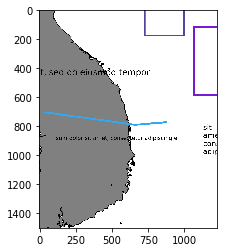

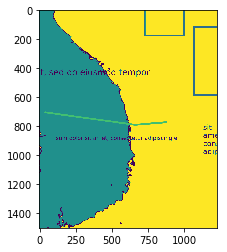

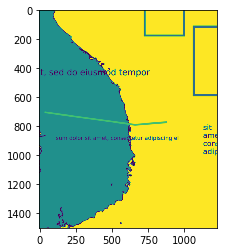

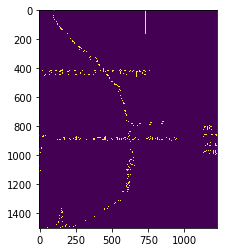

./data/piom_train_png_30k/6f2fdf0368.png


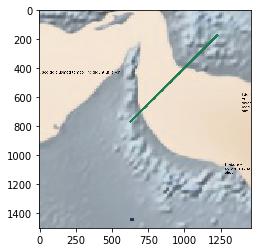

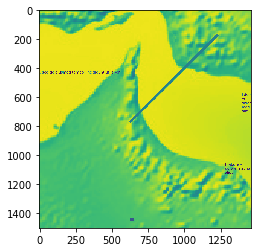

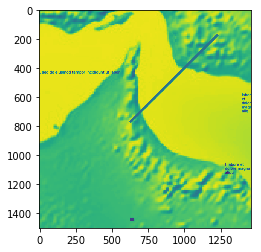

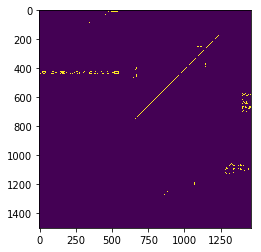

In [23]:
import os
import cv2 as cv

# convert the image to grayscale, blur it, and perform Canny edge detection
for idx in range (2, 4):
    img_name = os.path.join('./data/piom_train_png_30k/',
                                    trainDF.iloc[idx, 0] + '.png')
    print(img_name)
    image = cv.imread(img_name)
    plt.imshow(image)
    plt.show()
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(gray)
    plt.show()
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    plt.imshow(blurred)
    plt.show()
    canny = cv.Canny(blurred, 0, 255)
    plt.imshow(canny)
    plt.show()

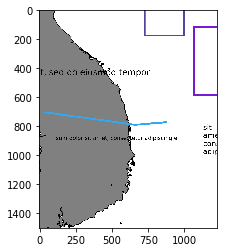

(1500, 1224, 3)


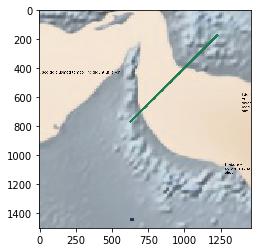

(1500, 1459, 3)


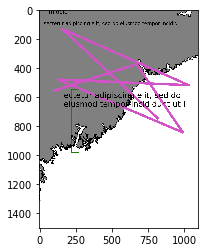

(1500, 1092, 3)


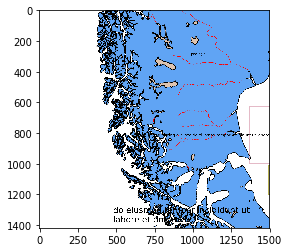

(1418, 1500, 3)


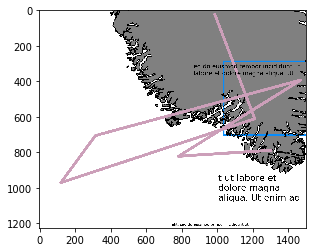

(1225, 1500, 3)


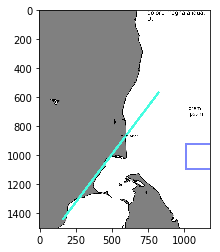

(1500, 1178, 3)


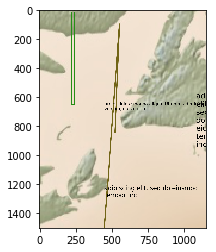

(1500, 1148, 3)


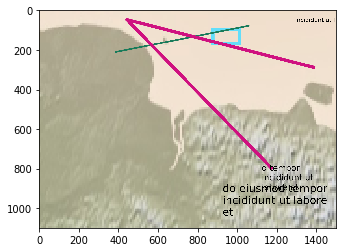

(1100, 1500, 3)


In [44]:
hMin = 0  # Hue minimum
hMax = 150 # Hue maximum
sMin = 30  # Saturation minimum
sMax = 255 # Saturation maximum
vMin = 0   # Value minimum (Also referred to as brightness)
vMax = 255 # Value maximum
# Set the minimum and max HSV values to display in the output image using numpys' array function. We need the numpy array since OpenCVs' inRange function will use those.
for idx in range (2, 10):
    img_name = os.path.join('./data/piom_train_png_30k/',
                                    trainDF.iloc[idx, 0] + '.png')
    image = cv.imread(img_name)
    plt.imshow(image)
    plt.show()
    print(image.shape)
#     lower = np.array([hMin, sMin, vMin])
#     upper = np.array([hMax, sMax, vMax])
#     # Create HSV Image and threshold it into the proper range.
#     hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV) # Converting color space from BGR to HSV
#     mask = cv.inRange(hsv, lower, upper) # Create a mask based on the lower and upper range, using the new HSV image
#     # Create the output image, using the mask created above. This will perform the removal of all unneeded colors, but will keep a black background.
#     output = cv.bitwise_and(image, image, mask=mask)
#     # Add an alpha channel, and update the output image variable
#     *_, alpha = cv.split(output)
#     dst = cv.merge((output, alpha))
#     output = dst
#     plt.imshow(output)
#     plt.show()